## Importing Required Libraries

In [153]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
import gensim
from sklearn.svm import LinearSVC
import random
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np

## Loading the Dataset

In [154]:
imdb = "E:/Momo/Datasets/imdbreviews/IMDB Dataset.csv"
imdb2 = "E:/Momo/Datasets/movie.csv/movie.csv"

df = pd.read_csv(imdb2).head(30000)
print(df.shape)
df.head()

(30000, 2)


,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


## Data Preprocessing

In [155]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [156]:
def clean_text(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]', '', text)
    text=re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = gensim.parsing.remove_stopwords(text)
    return text

df['text']=df['text'].apply(clean_text)
df.head()

,text,label
0,grew (b. ) watching loving thunderbirds. mates...,0
1,"movie dvd player, sat coke chips, expectations...",0
2,people know particular time past like feel nee...,0
3,"great biblical movies, bored death minute movi...",0
4,im die hard dads army fan change that. got tap...,1


## Splitting the dataset into training and testing data

In [157]:
# Split features and labels
X = df["text"]
y = df["label"]

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print(X_train.shape, X_test.shape)

(21000,) (9000,)


## Vectorizing the reviews

In [158]:
# Create feature vectors
vectorizer = CountVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
len(vectorizer.vocabulary_)
import matplotlib.pyplot as plt

In [159]:
# # Create feature vectors
# vectorizer = TfidfVectorizer()
# train_vectors = vectorizer.fit_transform(X_train)
# test_vectors = vectorizer.transform(X_test)

## Using the model's accuracy as fitness score

In [160]:
def fitness(params):
    C = params[0]
    model = LinearSVC(C=C)
    model.fit(train_vectors, y_train)
    y_pred = model.predict(test_vectors)
    return -precision_score(y_test, y_pred), -recall_score(y_test, y_pred)

## Parameter tuning using NSGA2

In [161]:
from pymoo.core.problem import Problem
import numpy as np

x = []
y = []

class ProblemWrapper(Problem):

    def _evaluate(self, params, out, *args, **kwargs):
        res = []
        for param in params:
            temp = fitness(param)
            x.append(temp[0])
            y.append(temp[1])
            res.append(temp)

        out['F'] = np.array(res)

In [162]:
problem = ProblemWrapper(n_var=1, n_obj=2, xl = [0.001], xu= [10.0])

In [163]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize

algorithm = NSGA2(pop_size=70)

stop_criteria = ('n_gen', 20)


In [164]:
results = minimize(
    problem=problem,
    algorithm=algorithm,
    termination=stop_criteria
)

c:\Users\AYUSH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AYUSH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AYUSH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AYUSH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AYUSH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

In [165]:
print(results.F)

[[-0.88105631 -0.8907767 ]
 [-0.88309115 -0.88503972]
 [-0.88209511 -0.88812886]
 [-0.88174863 -0.89011474]
 [-0.8825341  -0.88526037]
 [-0.88246924 -0.88636364]
 [-0.88218517 -0.88724625]
 [-0.88160769 -0.89055605]
 [-0.88309115 -0.88503972]
 [-0.88309115 -0.88503972]
 [-0.88218517 -0.88724625]
 [-0.88105631 -0.8907767 ]
 [-0.88218517 -0.88724625]
 [-0.88174863 -0.89011474]
 [-0.88174863 -0.89011474]
 [-0.88309115 -0.88503972]
 [-0.88218517 -0.88724625]
 [-0.88218517 -0.88724625]
 [-0.88174863 -0.89011474]
 [-0.88218517 -0.88724625]
 [-0.88218517 -0.88724625]
 [-0.88105631 -0.8907767 ]
 [-0.88218517 -0.88724625]
 [-0.88174863 -0.89011474]
 [-0.88218517 -0.88724625]
 [-0.88174863 -0.89011474]
 [-0.88105631 -0.8907767 ]
 [-0.88309115 -0.88503972]
 [-0.88209511 -0.88812886]
 [-0.88309115 -0.88503972]
 [-0.88218517 -0.88724625]
 [-0.88309115 -0.88503972]
 [-0.88309115 -0.88503972]
 [-0.88174863 -0.89011474]
 [-0.88174863 -0.89011474]
 [-0.88246924 -0.88636364]
 [-0.88105631 -0.8907767 ]
 

In [166]:
sols = np.array(results.F)
print(sols[0])

[-0.88105631 -0.8907767 ]


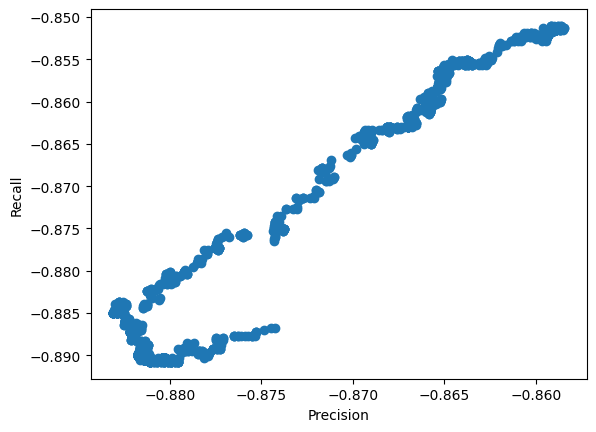

In [168]:
plt.figure(dpi=100)

x = np.array(x)
y = np.array(y)

plt.scatter(x, y)
plt.xlabel("Precision")
plt.ylabel("Recall")

plt.show()